# Ολική επεξεργασία εικόνας
Έχοντας μια εικόνα ακμών, συχνά καλούμαστε να εντοπίσουμε αντικείμενα ενδιαφέροντος. Σε τέτοιες περιπτώσεις, όλα τα εικονοστοιχεία είναι υποψήφια να συνδεθούν και να αποτελέσουν αντικείμενα ενδιαφέροντος. Η θέσπιση προκαθορισμένων ολικών ιδιοτήτων για τον εντοπισμό αντικειμένων μπορεί να οδηγήσει στο ποια από τα εικονοστοιχεία θα πρέπει να εξαλειφθούν ή να γίνουν αποδεκτά.

## Μετασχηματισμός Hough (1962)
Εξετάζει αν ένα σύνολο εικονοστοιχείων αποτελεί μέρος μιας καμπύλης η οποία χαρακτηρίζεται από κάποιο συγκεκριμένο σχήμα  (ευθεία, κύκλος). Ο εντοπισμός αυτών των καμπυλών βοηθά στην οριοθέτηση περιοχών ενδιαφέροντός μας.

### Εντοπισμός γραμμής

Θεωρήστε ένα σημείο του επιπέδου $(x,y)$  και τη γενική εξίσωση της ευθείας γραμμής $y_i=kx_i+d$.

Υπάρχουν άπειρες ευθείες που διέρχονται από το σημείο $(x_i,y_i)$ ικανοποιώντας την εξίσωση $y_i=kx_i+d$ για διάφορα $k,d$. 

Διατυπώνοντας την εξίσωση $y_i=kx_i+d$ ως $d=-x_ik+y_i$ και θεωρώντας το επίπεδο $kd$ (γνωστό ως χώρος παραμέτρων), μπορούμε να κατασκευάσουμε μια εξίσωση μίας και μοναδικής γραμμή για ένα ζεύγος τιμών $x_i,y_i$.

![alt text](https://drive.google.com/uc?id=1llXfVfBPuY_qwjzOBdGZ8mE-okA0zgAN)

Θεωρώντας τα σημεία $p_1=(x_1,y_1)$ και $p_2=(x_2,y_2)$, σημεία της ίδιας ευθείας $y_i=kx_i+d$,  διαθέτουν γραμμές στο χώρο των παραμέτρων, που τέμνονται στο ίδιο σημείο $q_{12}$.


![alt text](https://drive.google.com/uc?id=1T1-zXDmmKwPbdV4U6VHdVl8Xc7AnZtJY)

Κατά αυτόν τον τρόπο, έχουμε τη δυνατότητα να βρούμε τις κύριες γραμμές του επιπέδου $xy$ προσδιορίζοντας σημεία του χώρου παραμέτρων στα οποία τέμνεται ένας μεγάλος αριθμός γραμμών του χώρου της εικόνας.

Για παράδειγμα:

<img src="https://drive.google.com/uc?id=1NPYEk0BZUCia93YnRmLxcFi6h4LJeJKw" width="70%">

Οπότε στο πεδίο των παραμέτρων, στο $(k,d)=(0,1)$ και στο $(k,d)=(1,‐1)$ τέμνονται από 3 γραμμές. Η μετατροπή αυτών των σημείων στο πεδίο της εικόνας μας δίνουν $(0,1)\rightarrow y = 1$, $(1,‐1) \rightarrow y = x ‐ 1$


<img src="https://drive.google.com/uc?id=1h_r62rt_Pxw831bgUhCcP4gnlUNdOqL1" width="30%">

O μετασχηματισμός χρησιμοποιεί έναν πίνακα συσσώρευσης που αποτελεί τη διακριτή αναπαράσταση του χώρου των παραμέτρων ως πίνακας 2 διαστάσεων. 


Αρχικοποιείται με μηδενικές τιμές και για ένα σημείο του χώρου της εικόνας αυξάνουμε όλα τα σημεία στην αντίστοιχη γραμμή του χώρο παραμέτρων. 

O µετασχηµατισµός Hough διεξάγεται µέσω µίας διαδικασίας ψηφοφορίας στο χώρο των παραµέτρων. Όσες περισσότερες ψήφους έχει λάβει ένας συνδυασµός τιµών τόσο ισχυρότερες είναι οι ενδείξεις για την ύπαρξη, στην εικόνα, καµπύλης που χαρακτηρίζεται από τις συγκεκριµένες τιµές.

Οι παράµετροι για τις οποίες διεξάγεται η ψηφοφορία ισοδυναµούν µε τον αριθµό των µεταβλητών που χρειάζονται προκειµένου να ορισθεί πλήρως µία καµπύλη. Έτσι, μια γραμμή στην εικόνα θα είναι η τομή πολλαπλών γραμμών στο χώρο των παραμέτρων.

![alt text](https://drive.google.com/uc?id=1_mVLAJ9CgdXkqE8pe6HGBbjvmTid8L-a)


Μια πρακτική δυσκολία παρουσιάζεται όταν  οι γραμμές προσεγγίζουν την κατακόρυφη διεύθυνση οπότε το το $k\rightarrow\infty$.  Για να την παρακάμψουμε χρησιμοποιούμε την κανονική αναπαράσταση γραμμής : $xcos\theta+ysin\theta=ρ$

οπότε: $ρ_i=(x_i,y_i)\rightarrow r_{x_i,y_i}(θ)=x_icos\theta+y_isin(\theta)$

![alt text](https://drive.google.com/uc?id=14oVePNxbWnog97vZMPvw_9VoBdqkFWS7)

![](https://drive.google.com/uc?id=1Zd8gzDXBxITbSALOR04b4onJwrP2_Qyz)

Αντίστοιχα, υπολογίζεται ο πίνακας συσσώρευσης στο χώρο των παραμέτρων $ρ,θ$ και παρουσιάζει όλες τις υπάρχουσες ημιτονοειδής με κατακόρυφο άξονα το $ρ$ και οριζόντιο το $θ$.

Αρχικά, υπολογίζονται ορισµένα διαστήµατα για τις τιµές $ρ$ και $θ$ µε συγκεκριµένο βήµα, ανάλογο του µέγιστου αποδεκτού σφάλµατος. Όταν η γωνία $θ ∈ [0, π]$ , η απόσταση $ρ∈R$. Με βάση αυτά τα διαστήµατα δηµιουργείται ένας δισδιάστατος πίνακα ψηφοφορίας (accumulator matrix) που περιέχει όλα τα πιθανά διαστήµατα για τις παραµέτρους ρ, θ. 

Για κάθε ένα σηµείο στην εικόνα των ακµών υπολογίζεται η ηµιτονοειδής καµπύλη στον χώρο των παραµέτρων και αντίστοιχα στον δισδιάστατο πίνακα ψηφοφορίας, προσαυξάνονται τα ανάλογα διαστήµατα, στα οποία εµπίπτουν τα $ρ$ και $θ$ που υπολογίστηκαν για το σηµείο. Στο τέλος, επιλέγονται τα ζευγάρια $(ρ,θ)$ που έχουν συγκεντρώσει τις περισσότερες ψήφους, ως οι πιο επικρατούσες ευθείες στο επίπεδο $xy$. Ο αριθµός των ψήφων για κάθε ζευγάρι τιµών αποτελεί στην ουσία των αριθµό των σηµείων που ανήκουν στη συγκεκριµένη ευθεία.

Μπορεί να αποδειχθεί ότι το πλήθος των υπολογισμών του μετασχηματισμού Hough είναι γραμμική συνάρτηση του $n$, όπου $n$, το πλήθος των σημείων του επιπέδου $xy$, που δεν ανήκουν στο background της εικόνας
Πλεονεκτήµατα της προσέγγισης είναι η ανοχή σε θόρυβο και εν µέρει αποκρύψεις,
αλλά σηµαντικό µειονέκτηµα αποτελεί η εξάρτηση από την εικόνα ακµών (η οποία
εξαρτάται από τη φωτεινότητα της αρχικής εικόνας). 







![alt text](https://drive.google.com/uc?id=1agh_uUHksOS9niP5AFzqBfsgn8C3cO6r)

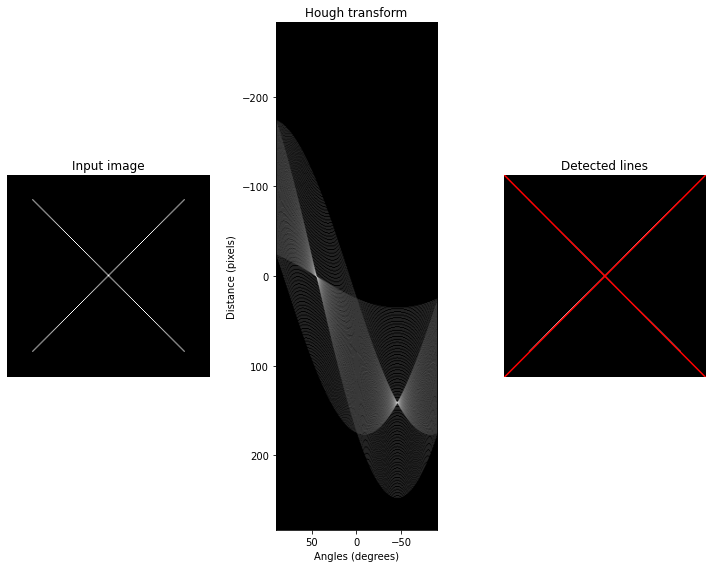

In [1]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data
import numpy as np
from ipywidgets import interact, widgets

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx[::-1], idx] = 255
image[idx, idx] = 255


# Classic straight-line Hough transform
#Inputs
#image, (M, N) ndarray: Input image with nonzero values representing edges.
#theta, 1D ndarray of double, optional, Angles at which to compute the transform, in radians. Defaults to a vector of 180 angles evenly spaced from -pi/2 to pi/2.
# Returns
# hspace, 2-D ndarray of uint64, Hough transform accumulator.
# angles, ndarray, Angles at which the transform is computed, in radians. (The angle accuracy can be improved by decreasing the step size in the theta array).
#distances,ndarray, distance values. The distance is the minimal algebraic distance from the origin to the detected line. 

# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(image, theta=tested_angles)


# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

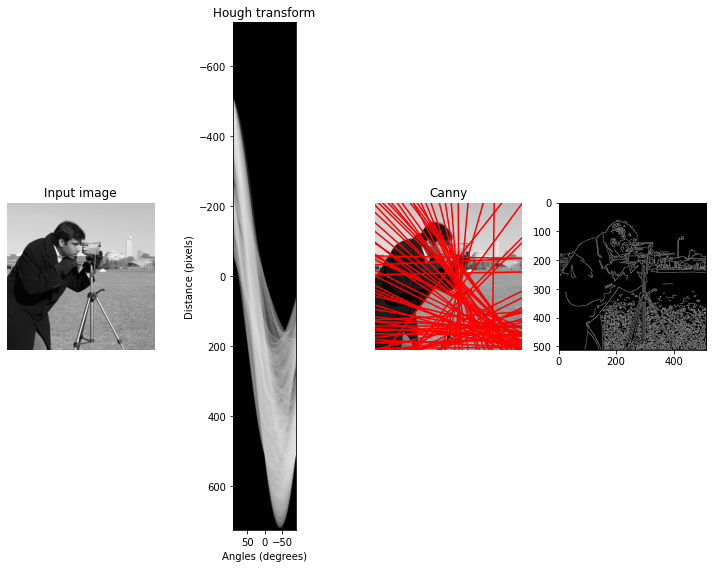

In [2]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

image=data.camera()
edges=canny(image)
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(edges, theta=tested_angles)


# Generating figure 1
fig, axes = plt.subplots(1, 4, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

ax[3].imshow(edges, cmap=cm.gray)
ax[2].set_title('Canny')
plt.tight_layout()
plt.show()

### Εντοπισμός κύκλου με μετασχηματισμό Hough

Ο µετασχηµατισµός Hough μπορεί να ανιχνεύσει και κύκλους σε μία εικόνα.

Σκοπός του  µετασχηµατισµoύ Hough είναι η εύρεση κάθε συνδυασμού $(\bar x, \bar y, ρ)$ που να επαληθεύει την εξίσωση  $(u-\bar x )^2+(v-\overline {y})^2=ρ^2$, όπου $(\bar x, \bar y)$ είναι οι συντεταγμένες του κέντρου του κύκλου ενώ $ρ$ η ακτίνα του.

Ο χώρος των παραµέτρων είναι τρισδιάστατος και αποτελείται από τις παραµέτρους $\bar x$, $\bar y$, και $ρ$. 

 ![alt text](https://drive.google.com/uc?id=1lt-osjN91KSxSJmujo6F7jYYa_sfVkit)

Κάθε σηµείο στην εικόνα απεικονίζεται στο χώρο των παραµέτρων ως κώνος και η τοµή πολλαπλών κώνων στο ίδιο σηµείο, υποδεικνύει την ύπαρξη κύκλου στην εικόνα µε κέντρο το $\bar x$, $\bar y$, και ακτίνα ίση µε $ρ_i$.

![alt text](https://drive.google.com/uc?id=1en12bLhqZaJ7at2vF0pycBjrjiwMhJ9o)

Αλγεβρικά, για την εφαρµογή του κυκλικού µετασχηµατιµού Hough απαιτείται
αρχικά ο ορισµός ενός ελάχιστου κι ενός µέγιστου ορίου της ακτίνας των κύκλων που πρόκειται να εντοπιστούν. Στη συνέχεια, δηµιουργείται ένας τρισδιάστατος πίνακας ψηφοφορίας που περιέχει όλα τα πιθανά διαστήµατα για τις συντεταγµένες του κέντρου και την ακτίνα. Τα διαστήµατα ορίζονται µε βάση το µέγιστο αποδεκτό
σφάλµα.

Για κάθε εικονοστοιχείο που ανήκει σε ακµή της εικόνας, όπως αυτές έχουν ανιχνευθεί από τον τελεστή Canny, χαράσσονται τόσοι κύκλοι όσα και τα διαστήµατα των πιθανών ακτινών. Ταυτόχρονα, για κάθε κύκλο που χαράσσεται οι αντίστοιχες τιµές ακτίνας και κέντρου προσαυξάνονται κατά µια ψήφο στον τελικό πίνακα ψηφοφορίας. Τελικά, ο εντοπισµός των κύκλων πραγµατοποιείται για τις τιµές µε τις περισσότερες ψήφους. 

![alt text](https://drive.google.com/uc?id=1Ryuz1pdOEM9XVrzynh-_fgmXRkRDr2p-)

#### Χρήση μετασχηματισμού Hough για να εξαγάγουμε τις θέσεις των κύκλων και ακτίνες.

Πρέπει να καθορίσουμε τις ακτίνες που θέλουμε να αναζητήσουμε στην εικόνα μας 
π.χ. $10^ο-30^ο$ με βήμα 2.  

O μετασχηματισμός Hough απλά υπολογίζει τα εικονοστοιχεία σε μία λεπτή κυκλική μάσκα. Εφόσον η είσοδος είναι μία εικόνα ακμών, η έξοδο του αλγορίθμου θα είναι πιο ακριβής όταν το κέντρο της κυκλικής μάσκας που υπολογίζει βρίσκεται στο κέντρο ενός κύκλου με την ίδια ακτίνα.

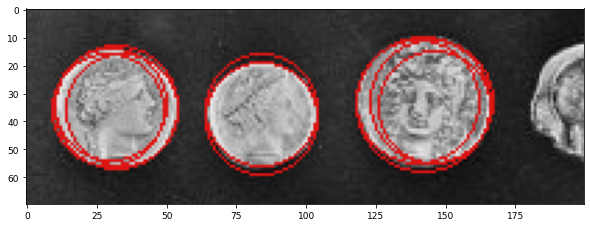

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=10)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

Εντοπισμός έλλειψης με μετασχηματισμό Hough

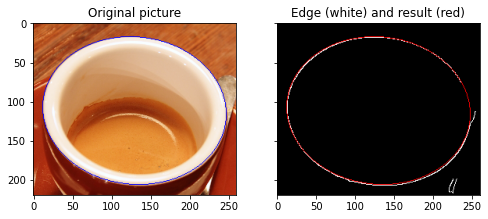

In [4]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)


edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250, min_size=100, max_size=120)
result.sort(order='accumulator')


# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

Η ίδια ιδέα που περιγράφεται σε αυτήν την ενότητα μπορεί να εφαρμοστεί στην ανίχνευση γραμμής, την ανίχνευση έλλειψης και διάφορα άλλα χαρακτηριστικά ενδιαφέροντος.


## Κατωφλίωση Otsu



Η μέθοδος Otsu είναι μια μέθοδος προσαρμοστικής κατωφλίωση μιας εικόνας, η οποία αναζητά τη βέλτιστη τιμή κατωφλίου με σκοπό να διακρίνει δεδομένα δύο κατηγοριών (π.χ. φόντο και προσκήνιο) της εικόνας. 

<font size=2>[N. Otsu, "A Threshold Selection Method from Gray-Level Histograms," in IEEE Transactions on Systems, Man, and Cybernetics, vol. 9, no. 1, pp. 62-66, Jan. 1979.](http://web-ext.u-aizu.ac.jp/course/bmclass/documents/otsu1979.pdf)</font>
---

<img src="https://drive.google.com/uc?id=1Iu2frcLTBEZ2IbYnLamwAIX1EJZHJpiQ" width=40%>
<img src="https://drive.google.com/uc?id=16c_-neWBRreJJct4zhOdyXG1Xey53uyD" width=40%>
<img src="https://drive.google.com/uc?id=1ss7r0xx7i9cJ4SsTFQ40XcghK216kY5M" width=40%>
με $μ_1=1$ και $μ_2=13/4$



<img src="https://drive.google.com/uc?id=1wxd43m4XQMq2d_h_PaDiZK80IrA2xiRP" width=40%>



<img src="https://drive.google.com/uc?id=14xOIHg1McIjniG0mww95w5H8DwerKGwu" width=40%>

<img src="https://drive.google.com/uc?id=1rtKa9T2z99wn83ugRVZ61TJtGvRH7xwl" width=40%>

Threshold: 102


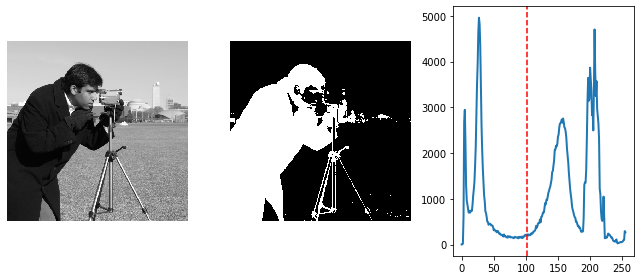

In [5]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure

camera = data.camera()
val = filters.threshold_otsu(camera)
print("Threshold:", val)
hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(camera < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='r', ls='--')

plt.tight_layout()
plt.show()

### Κατωφλίωση Multi-Otsu

O Multi-Otsu είναι ένας αλγόριθμος κατωφλίου που χρησιμοποιείται για το διαχωρισμό των εικονοστοιχείων μιας εικόνας εισόδου σε πολλές διαφορετικές κατηγορίες, καθεμία από τις οποίες λαμβάνεται σύμφωνα με την ένταση των επιπέδων του γκρίζου στην εικόνα. Το Multi-Otsu υπολογίζει διαφορετικά κατώφλια, που καθορίζονται από τον επιθυμητό πλήθος κατηγοριών στην εικόνα. Ο προεπιλεγμένος αριθμός κατηγοριών είναι 3: για την απόκτηση τριών κατηγοριών, ο αλγόριθμος επιστρέφει δύο τιμές κατωφλίου (αντιπροσωπεύονται από μια κόκκινη γραμμή στο παρακάτω ιστόγραμμα).

<font size=2>[
Liao, P-S., Chen, T-S. and Chung, P-C., “A fast algorithm for multilevel thresholding”, Journal of Information Science and Engineering 17 (5): 713-727, 2001](http://ftp.iis.sinica.edu.tw/JISE/2001/200109_01.pdf)

[ 69 134 180]
(512, 512)


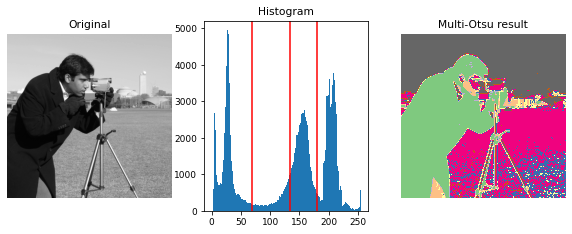

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image,classes=4)
print(thresholds)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)
print(regions.shape)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()